In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysd
from SALib.sample import saltelli
from SALib.analyze import sobol
import scipy as sp

# Load Calibration data

In [3]:
data = pd.read_csv("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/data/dynamic/calibration_incidence.csv", sep=',',decimal='.')
data=data.drop("Unnamed: 0",axis=1)
data.head(23)


,year,var,Lower,Mean,Upper
0,2000,e_inc_num,56000,139000,259000
1,2001,e_inc_num,57000,159000,312000
2,2002,e_inc_num,57000,175000,357000
3,2003,e_inc_num,54000,206000,456000
4,2004,e_inc_num,54000,221000,501000
5,2005,e_inc_num,56000,226000,510000
6,2006,e_inc_num,56000,239000,549000
7,2007,e_inc_num,60000,235000,525000
8,2008,e_inc_num,66000,221000,467000
9,2009,e_inc_num,68000,228000,483000


Text(0.5, 1.0, 'Estimated Incident cases of TB')

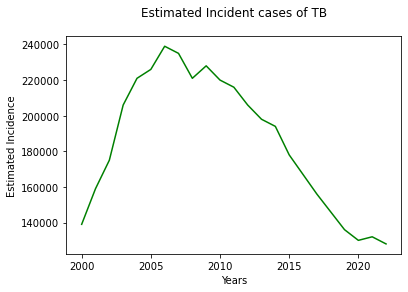

In [4]:
plt.plot(data["year"], data['Mean'],label="mean_estimate",color="green")
#plt=dataSoil.plot(x="days",y="bacteria_measured")
plt.xlabel('Years')
plt.ylabel('Estimated Incidence')
plt.title("Estimated Incident cases of TB",pad=20)

# Load Model

In [10]:
model = pysd.read_vensim("/Users/adenooy/Library/CloudStorage/OneDrive-Personal/UVA/Thesis/MSc-Thesis/model/transmission/V7_months.mdl")

In [11]:
model_output = model.run()
display(model_output.head(276))

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Active,fast prop,slow progression rate,fast progression,slow progression,progression,...,total pop,general mortality,infection,initial incident,initial latent,diagnosis delay,Detected and Treated TB,relapse rate,force of infection,fast progression rate
0,276,0,12,1,3.000000e+05,0.1,0.09,1000.000000,81000.000000,82000.000000,...,3.805500e+07,0.000625,43397.713835,300000,1000000.0,6,5.500000e+04,0.003,0.15,0.01
12,276,0,12,1,9.976696e+05,0.1,0.09,1122.605478,90931.043717,92053.649195,...,3.886345e+07,0.000625,140528.347264,300000,1000000.0,6,2.486848e+05,0.003,0.15,0.01
24,276,0,12,1,1.847586e+06,0.1,0.09,1919.381128,155469.871332,157389.252460,...,3.962518e+07,0.000625,245963.935550,300000,1000000.0,6,6.902798e+05,0.003,0.15,0.01
36,276,0,12,1,3.210434e+06,0.1,0.09,3178.397507,257450.198065,260628.595571,...,4.030857e+07,0.000625,387249.687330,300000,1000000.0,6,1.505672e+06,0.003,0.15,0.01
48,276,0,12,1,5.244841e+06,0.1,0.09,4801.467397,388918.859195,393720.326593,...,4.085778e+07,0.000625,537386.709997,300000,1000000.0,6,2.902867e+06,0.003,0.15,0.01
60,276,0,12,1,7.811258e+06,0.1,0.09,6334.191411,513069.504324,519403.695735,...,4.121195e+07,0.000625,623296.696120,300000,1000000.0,6,5.143209e+06,0.003,0.15,0.01
72,276,0,12,1,1.027352e+07,0.1,0.09,7028.773703,569330.669907,576359.443610,...,4.134114e+07,0.000625,582722.209828,300000,1000000.0,6,8.406162e+06,0.003,0.15,0.01
84,276,0,12,1,1.171603e+07,0.1,0.09,6499.006762,526419.547703,532918.554464,...,4.128746e+07,0.000625,446139.332782,300000,1000000.0,6,1.259108e+07,0.003,0.15,0.01
96,276,0,12,1,1.165341e+07,0.1,0.09,5161.226925,418059.380960,423220.607885,...,4.116409e+07,0.000625,302308.622557,300000,1000000.0,6,1.723036e+07,0.003,0.15,0.01
108,276,0,12,1,1.040305e+07,0.1,0.09,3730.967517,302208.368891,305939.336409,...,4.109704e+07,0.000625,200671.240991,300000,1000000.0,6,2.167803e+07,0.003,0.15,0.01


<AxesSubplot:>

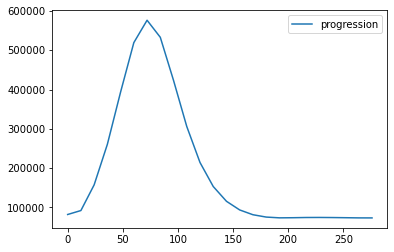

In [12]:
model_output.plot(y="progression")

## Calibration

In [14]:
#Set up observable and claibration parameters
observable = "progression"
parameter1 = 'force of infection'
parameter2 = 'relapse rate'
parameter3 = 'initial latent'
parameter4="fast progression rate"
parameter5 = 'CFR'
parameter6 = "slow progression rate"



def error(param_list):
    #unpack the parameter list
    parameter1_value,parameter2_value,parameter3_value,parameter4_value,parameter5_value,parameter6_value = param_list
    #run the model with the new parameters, returning the info we're interested in
    result = model.run(params={'force of infection':parameter1_value,
                               'relapse rate':parameter2_value,
                               'initial latent': parameter3_value,
                               "fast progression rate":parameter4_value,
                               'CFR': parameter5_value,
                               "slow progression rate":parameter6_value,
                              },
                       return_columns=['progression'],
                       return_timestamps=list(data.index*12)[0:23])
    #print(result['progression'] -data['Mean'])
    
    result=result.reset_index(drop=True)
    #print(result)
    calDat=data.reset_index(drop=True)
    calDat=calDat["Mean"]
    
    error=sum((result['progression'] - calDat)**2)
    #print(error)
    #return the sum of the squared errors
    return  error

In [15]:
parameter1_guess = 0.05
parameter1_bounds = (0.0, 1)

parameter2_guess = 0.1
parameter2_bounds = (0.004, 0.1)

parameter3_guess = 100000
parameter3_bounds = (1, 3000000)

parameter4_guess = 0.08
parameter4_bounds = (0, 1)

parameter5_guess =0.4
parameter5_bounds = (0.1,1)

parameter6_guess = 0.08
parameter6_bounds = (0, 1)



res = sp.optimize.minimize(error,
                           x0=[parameter1_guess,parameter2_guess,parameter3_guess,parameter4_guess,parameter5_guess,parameter6_guess],
                           method='L-BFGS-B',
                           bounds=[parameter1_bounds,parameter2_bounds,parameter3_bounds,parameter4_bounds,parameter5_bounds,parameter6_bounds])
res

      fun: 14472056393.974499
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.27254675e+08, -1.92602129e+10, -7.23944186e+03,  1.88045501e+06,
        4.33733747e+08,  1.69485091e+07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 917
      nit: 70
     njev: 131
   status: 0
  success: True
        x: array([6.05986399e-01, 1.00000000e-01, 1.38671785e+05, 8.43409118e-01,
       5.86354816e-01, 9.80543391e-01])

In [20]:
p1, p2, p3,p4,p5,p6= res.x
result = model.run(params=
                   {
                       'force of infection':p1,
                               'relapse rate':p2,
                               'initial latent': p3,
                               "fast progression rate":p4,
                               "CFR":p5,
                       "slow progression rate":p6
                   },
                   return_columns=['progression'])

result=result.reset_index(drop=True)
result["year"]=data["year"]

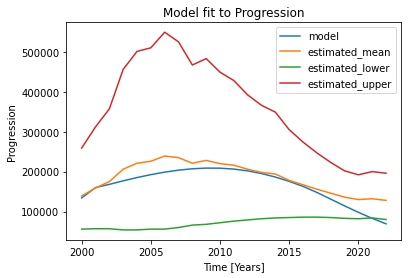

In [21]:
plt.plot(result["year"], result['progression'],label="model")
plt.plot(data["year"], data['Mean'], label='estimated_mean');
plt.plot(data["year"], data['Lower'], label='estimated_lower');
plt.plot(data["year"], data['Upper'], label='estimated_upper');
plt.xlabel('Time [Years]')
plt.ylabel('Progression')
plt.title('Model fit to Progression')
plt.legend(loc='upper right')
#plt.text(30,750000000, 'RMSE: 7.39% of Max', color='r', fontsize=12)